In [48]:
import cv2
import csv
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

/home/mbsaloka/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [18]:
map_index = 1
file_name = f'perumdos-{map_index}.png'

map_image = cv2.imread(file_name, cv2.IMREAD_COLOR)
map_image = cv2.resize(map_image, (1920, 1080))
img = map_image.copy()

coordinates = []

with open(f'coordinates-{map_index}.csv', mode='r') as file:
  reader = csv.reader(file)
  next(reader)
  for row in reader:
    x, y = int(row[1]), int(row[2])
    coordinates.append((x, y))
    cv2.circle(img, (x, y), 5, (0, 0, 255), -1)

print(coordinates)

[(1201, 148), (1173, 156), (1133, 158), (1099, 163), (1067, 167), (1033, 174), (990, 187), (1207, 204), (1170, 220), (1107, 221), (1116, 199), (1085, 202), (1058, 221), (1042, 246), (1025, 226), (968, 213), (950, 215), (962, 194), (938, 229), (940, 258), (923, 261), (919, 234), (904, 261), (890, 271), (869, 276), (852, 283), (997, 241), (976, 247), (997, 259), (975, 263), (860, 320), (961, 287), (958, 314), (915, 357), (895, 331), (852, 367), (1220, 287), (1173, 292), (1228, 340), (1209, 351), (1178, 334), (1158, 351), (1124, 306), (1101, 309), (1046, 333), (1100, 368), (1037, 378), (1017, 342), (1239, 425), (1221, 447), (1213, 422), (1177, 434), (1113, 442), (1092, 460), (1047, 449), (1007, 442), (976, 447), (916, 424), (933, 447), (904, 444), (878, 463), (899, 486), (1249, 498), (1197, 510), (1135, 522), (1058, 536), (997, 541), (929, 557), (860, 564), (1257, 554), (1209, 555), (1131, 573), (1075, 578), (997, 586), (955, 597), (927, 603), (866, 608), (836, 608), (730, 553), (765, 504

In [4]:
def print_coordinates(event, x, y, flags, param):
	if event == cv2.EVENT_LBUTTONDOWN:
		coordinates.append((x, y))
		# print(f"[{x}, {y}],")
		cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
		cv2.imshow("Image", img)

cv2.imshow("Image", img)
cv2.setMouseCallback("Image", print_coordinates)

while True:
	key = cv2.waitKey(1) & 0xFF

	if key == ord('d'):
		if len(coordinates) > 0:
			coordinates.pop()
			img = map_image.copy()
			for coord in coordinates:
				cv2.circle(img, coord, 5, (0, 0, 255), -1)
			cv2.imshow("Image", img)

	elif key == 27:
		break

cv2.destroyAllWindows()

with open(f'coordinates-{map_index}.csv', mode='w', newline='') as file:
	writer = csv.writer(file)
	writer.writerow(['No', 'X', 'Y'])
	for i, coord in enumerate(coordinates):
		writer.writerow([i, coord[0], coord[1]])

print(coordinates)

[(1201, 148), (1173, 156), (1133, 158), (1067, 167), (1099, 163), (1033, 174), (990, 187), (1207, 204), (1170, 220), (1107, 221), (1116, 199), (1085, 202), (1058, 221), (1042, 246), (1025, 226), (968, 213), (950, 215), (962, 194), (938, 229), (940, 258), (923, 261), (919, 234), (904, 261), (890, 271), (869, 276), (852, 283), (997, 241), (976, 247), (997, 259), (975, 263), (860, 320), (961, 287), (958, 314), (915, 357), (895, 331), (852, 367), (1220, 287), (1173, 292), (1228, 340), (1209, 351), (1178, 334), (1158, 351), (1124, 306), (1101, 309), (1046, 333), (1100, 368), (1037, 378), (1017, 342), (1239, 425), (1221, 447), (1213, 422), (1177, 434), (1113, 442), (1092, 460), (1047, 449), (1007, 442), (976, 447), (916, 424), (933, 447), (904, 444), (878, 463), (899, 486), (1249, 498), (1197, 510), (1135, 522), (1058, 536), (997, 541), (929, 557), (860, 564), (1257, 554), (1209, 555), (1131, 573), (1075, 578), (997, 586), (955, 597), (927, 603), (866, 608), (836, 608), (730, 553), (765, 504

In [5]:
# Fungsi untuk menghitung jarak Euclidean antara dua titik (x1, y1) dan (x2, y2)
def euclidean_distance(p1, p2):
  return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [6]:
point1 = [
  (657, 156),
  (829, 177),
  (294, 218)
]

point2 = [
  (709, 147),
  (834, 217),
  (425, 219)
]

real_distance = [
  28.78,
  17.9,
  45.3
]

scale = real_distance[map_index-1] / euclidean_distance(point1[map_index-1], point2[map_index-1])
print(scale)

0.5453536068946114


In [7]:
# Find distance between every pair of points
distances = distance_matrix(coordinates, coordinates)
n = len(coordinates)

In [20]:
# Prim's Algorithm

def prim_algorithm(n, distances):
  mst_edges = []
  visited = [False] * n
  edge_costs = [float('inf')] * n
  parent = [-1] * n

  edge_costs[0] = 0

  for _ in range(n):
    min_cost = float('inf')
    u = -1
    for v in range(n):
      if not visited[v] and edge_costs[v] < min_cost:
        min_cost = edge_costs[v]
        u = v

    visited[u] = True

    if parent[u] != -1:
      mst_edges.append((parent[u], u))

    for v in range(n):
      if not visited[v] and distances[u][v] < edge_costs[v]:
        edge_costs[v] = distances[u][v]
        parent[v] = u

  total_weight_prim = sum(distances[u][v] for u, v in mst_edges)
  return mst_edges, total_weight_prim

start_time = time.time() # Start Timer
mst_edges, total_weight_prim = prim_algorithm(n, distances)
end_time = time.time() # End Timer
elapsed_time_prim = end_time - start_time

img_result_prim = cv2.imread(file_name, cv2.IMREAD_COLOR)
img_result_prim = cv2.resize(img_result_prim, (1920, 1080))

print("Edges in MST Prim's:")
for edge in mst_edges:
  u, v = edge
  weight = distances[u][v]
  print(f"{u+1} -> {v+1} with distance {weight*scale:.2f}m")
print(f"Total distance of MST: {total_weight_prim*scale:.2f}m")
print(f"Elapsed Time: {elapsed_time_prim*100:.3f}ms")

for index, coord in enumerate(coordinates):
  cv2.circle(img_result_prim, tuple(coord), 5, (0, 0, 255), -1)
  cv2.putText(img_result_prim, str(index + 1), tuple(coord), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2, cv2.LINE_AA)

for edge in mst_edges:
  pt1 = tuple(coordinates[edge[0]])
  pt2 = tuple(coordinates[edge[1]])
  cv2.line(img_result_prim, pt1, pt2, (255, 0, 0), 2)

cv2.imshow("MST Prim's Result", img_result_prim)
cv2.waitKey(0)
cv2.destroyAllWindows()

Edges in MST Prim's:
1 -> 2 with distance 15.88m
2 -> 3 with distance 21.84m
3 -> 5 with distance 18.74m
5 -> 4 with distance 17.59m
4 -> 6 with distance 18.93m
4 -> 12 with distance 21.46m
12 -> 10 with distance 15.85m
10 -> 11 with distance 12.96m
12 -> 13 with distance 18.00m
13 -> 14 with distance 16.19m
14 -> 15 with distance 14.31m
15 -> 27 with distance 17.32m
27 -> 29 with distance 9.82m
27 -> 28 with distance 11.91m
28 -> 30 with distance 8.74m
30 -> 32 with distance 15.15m
32 -> 33 with distance 14.82m
28 -> 16 with distance 19.05m
16 -> 17 with distance 9.88m
17 -> 19 with distance 10.06m
19 -> 22 with distance 10.71m
16 -> 18 with distance 10.87m
22 -> 21 with distance 14.89m
21 -> 20 with distance 9.41m
21 -> 23 with distance 10.36m
23 -> 24 with distance 9.38m
24 -> 25 with distance 11.77m
25 -> 26 with distance 10.03m
18 -> 7 with distance 15.74m
26 -> 31 with distance 20.64m
31 -> 35 with distance 20.01m
35 -> 34 with distance 17.89m
26 -> 148 with distance 20.73m
31 ->

In [21]:
# Kruskal's Algorithm

def kruskal_algorithm(coordinates, distances):
  edges = []
  for i, coord1 in enumerate(coordinates):
    for j, coord2 in enumerate(coordinates):
      if i < j:
        dist = distances[i][j]
        edges.append((dist, i, j))

  edges.sort()

  parent = list(range(len(coordinates)))
  rank = [0] * len(coordinates)

  def find(x):
    if parent[x] != x:
      parent[x] = find(parent[x])
    return parent[x]

  def union(x, y):
    rootX = find(x)
    rootY = find(y)

    if rootX != rootY:
      if rank[rootX] > rank[rootY]:
        parent[rootY] = rootX
      elif rank[rootX] < rank[rootY]:
        parent[rootX] = rootY
      else:
        parent[rootY] = rootX
        rank[rootX] += 1

  mst_edges = []
  total_weight_kruskal = 0

  for dist, u, v in edges:
    if find(u) != find(v):
      union(u, v)
      mst_edges.append((u, v, dist))
      total_weight_kruskal += dist

  return mst_edges, total_weight_kruskal

start_time = time.time() # Start Timer
mst_edges, total_weight_kruskal = kruskal_algorithm(coordinates, distances)
end_time = time.time() # End Timer
elapsed_time_kruskal = end_time - start_time

print("Edges in MST Kruskal's:")
for edge in mst_edges:
  print(f"{edge[0]} -> {edge[1]} with distance {edge[2] * scale:.2f}")
print(f"Total distance of MST: {total_weight_kruskal * scale:.2f}")
print(f"Elapsed Time: {elapsed_time_kruskal*100:.3f}ms")

img_result_kruskal = cv2.imread(file_name, cv2.IMREAD_COLOR)
img_result_kruskal = cv2.resize(img_result_kruskal, (1920, 1080))

for index, node in enumerate(coordinates):
  cv2.circle(img_result_kruskal, node, 5, (0, 0, 255), -1)
  cv2.putText(img_result_kruskal, str(index+1), node, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2, cv2.LINE_AA)

for edge in mst_edges:
  pt1 = coordinates[edge[0]]
  pt2 = coordinates[edge[1]]
  cv2.line(img_result_kruskal, pt1, pt2, (255, 0, 0), 2)

cv2.imshow("MST Kruskal's Result", img_result_kruskal)
cv2.waitKey(0)
cv2.destroyAllWindows()

Edges in MST Kruskal's:
27 -> 29 with distance 8.74
22 -> 23 with distance 9.38
19 -> 20 with distance 9.41
26 -> 28 with distance 9.82
15 -> 16 with distance 9.88
24 -> 25 with distance 10.03
16 -> 18 with distance 10.06
20 -> 22 with distance 10.36
18 -> 21 with distance 10.71
15 -> 17 with distance 10.87
89 -> 91 with distance 11.66
23 -> 24 with distance 11.77
26 -> 27 with distance 11.91
38 -> 39 with distance 11.97
119 -> 120 with distance 12.00
97 -> 98 with distance 12.01
90 -> 92 with distance 12.11
136 -> 137 with distance 12.19
132 -> 133 with distance 12.26
42 -> 43 with distance 12.65
57 -> 59 with distance 12.72
121 -> 122 with distance 12.73
9 -> 10 with distance 12.96
89 -> 125 with distance 13.49
100 -> 101 with distance 13.73
95 -> 96 with distance 13.90
48 -> 50 with distance 14.27
13 -> 14 with distance 14.31
40 -> 41 with distance 14.31
49 -> 50 with distance 14.31
93 -> 94 with distance 14.73
31 -> 32 with distance 14.82
20 -> 21 with distance 14.89
104 -> 105 wit

In [22]:
# Displaying Comparison

crop_size = [
  (500, 1400),
  (400, 1450),
  (500, 1400)
]

image1 = img_result_prim.copy()
image2 = img_result_kruskal.copy()

height, width, _ = image1.shape

image1 = image1[0:height, crop_size[map_index-1][0]:crop_size[map_index-1][1]]
image2 = image2[0:height, crop_size[map_index-1][0]:crop_size[map_index-1][1]]

cv2.rectangle(image1, (0, 0), (image1.shape[1], 50), (0, 0, 0), -1)
cv2.rectangle(image2, (0, 0), (image2.shape[1], 50), (0, 0, 0), -1)

cv2.putText(image1, "Prim's", (int(image1.shape[1]*0.5) - 20, 35), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(image2, "Kruskal's", (int(image2.shape[1]*0.5) - 50, 35), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

cv2.putText(image1, f"Number of Node: {len(coordinates)} | Total Distance: {total_weight_prim*scale:.2f}m | Elapsed Time: {elapsed_time_prim*100:.2f}ms", (10, height - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(image2, f"Number of Node: {len(coordinates)} | Total Distance: {total_weight_kruskal*scale:.2f}m | Elapsed Time: {elapsed_time_kruskal*100:.2f}ms", (10, height - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

comparison = np.hstack((image1, image2))
cv2.line(comparison, (image1.shape[1], 0), (image1.shape[1], height), (0, 0, 0), 2)

height, width, _ = comparison.shape
new_height = int(height * 0.9)
new_width = int(width * 0.9)
comparison = cv2.resize(comparison, (new_width, new_height))

cv2.imshow("Comparison", comparison)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [147]:
# Save Result
cv2.imwrite(f"result-{map_index}.png", comparison)

True

Time Execution Test
     No  Prim's (ms)  Kruskal's (ms)
      1     5.261183        9.272575
      2     6.370306        8.731127
      3     4.580021        8.638144
      4     3.018141        8.735657
      5     2.912045        8.652210
      6     2.952099        8.657932
      7     3.433943        8.658409
      8     4.342079        8.695841
      9     3.681421        8.639336
     10     3.757477        8.600235
     11     2.895117        8.701563
     12     2.847195        8.818865
     13     2.826929        8.791685
     14     3.184080        8.535624
     15     3.458738        8.816481
     16     2.737284        8.603573
     17     2.776623        9.583235
     18     2.800465        8.795500
     19     2.880096        8.870125
     20     2.857924        8.571625
     21     2.866507        8.620262
     22     2.835035        8.522511
     23     2.745390        8.620739
     24     2.733231        8.566618
     25     2.736330        8.858204
     26     2.7375

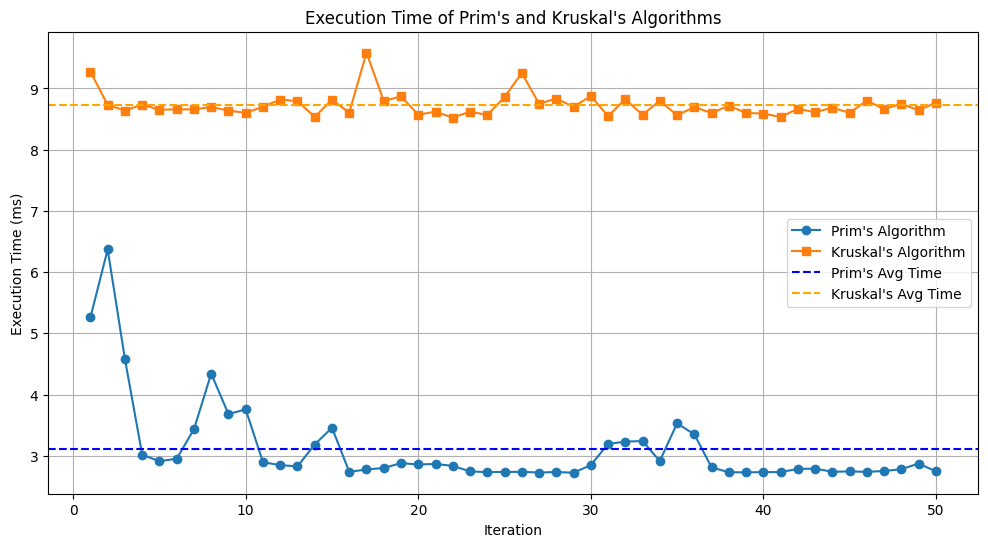

In [49]:
# Test Time Execution

def test_algorithms(n, distances, coordinates, N):
  data = []

  prim_times = []
  for i in range(N):
    start_time = time.time()
    prim_algorithm(n, distances)
    elapsed_time = (time.time() - start_time) * 1000
    prim_times.append(elapsed_time)

  kruskal_times = []
  for i in range(N):
    start_time = time.time()
    kruskal_algorithm(coordinates, distances)
    elapsed_time = (time.time() - start_time) * 1000
    kruskal_times.append(elapsed_time)

  for i in range(N):
    data.append([i + 1, prim_times[i], kruskal_times[i]])

  avg_prim = sum(prim_times) / N
  avg_kruskal = sum(kruskal_times) / N
  data.append(["Average", avg_prim, avg_kruskal])

  df = pd.DataFrame(data, columns=["No", "Prim's (ms)", "Kruskal's (ms)"])

  print("Time Execution Test")
  print(df.to_string(index=False))

  # Visualizations
  plt.figure(figsize=(12, 6))

  plt.plot(range(1, N + 1), prim_times, label="Prim's Algorithm", marker='o')
  plt.plot(range(1, N + 1), kruskal_times, label="Kruskal's Algorithm", marker='s')

  plt.axhline(avg_prim, color='blue', linestyle='--', label="Prim's Avg Time")
  plt.axhline(avg_kruskal, color='orange', linestyle='--', label="Kruskal's Avg Time")

  plt.title("Execution Time of Prim's and Kruskal's Algorithms")
  plt.xlabel("Iteration")
  plt.ylabel("Execution Time (ms)")
  plt.legend()
  plt.grid()

  plt.show()

test_algorithms(n, distances, coordinates, 50)